## CNN Image Classifier - Data Augmentation
One fundamental characteristic of deep learning is that it is able to find interesting features in the training data on its own. Usually, this requires training your model on lots of training samples. This is especially true for problems where the input samples are high-dimensional, like images.  Here we use data augmentation to assist in producing a high-quality classification model when only limited sample data is available. 


In [1]:
# import libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
# define CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), data_format='channels_last', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model    

In [3]:
# create the CNN model
model = cnn_model()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
# define dataset locations
base_dir = 'data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
# turn image files on disk into batches of pre-processed floating point tensors
# normalize and augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # target directory
    train_dir,
    # resize images to 150x150
    target_size=(150,150),
    batch_size=32,
    # assign binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# review the generator output
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [7]:
# fit the model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=150, validation_data=validation_generator, validation_steps=50)

Epoch 1/150
100/100 [==============================] - 280s 3s/step - loss: 0.6936 - acc: 0.5231 - val_loss: 0.6962 - val_acc: 0.5114
Epoch 2/150
100/100 [==============================] - 272s 3s/step - loss: 0.6833 - acc: 0.5509 - val_loss: 0.6711 - val_acc: 0.5508
Epoch 3/150
100/100 [==============================] - 274s 3s/step - loss: 0.6729 - acc: 0.5825 - val_loss: 0.6444 - val_acc: 0.6529
Epoch 4/150
100/100 [==============================] - 272s 3s/step - loss: 0.6548 - acc: 0.6053 - val_loss: 0.6272 - val_acc: 0.6326
Epoch 5/150
100/100 [==============================] - 324s 3s/step - loss: 0.6390 - acc: 0.6328 - val_loss: 0.6253 - val_acc: 0.6440
Epoch 6/150
100/100 [==============================] - 367s 4s/step - loss: 0.6215 - acc: 0.6422 - val_loss: 0.5866 - val_acc: 0.6885
Epoch 7/150
100/100 [==============================] - 366s 4s/step - loss: 0.6066 - acc: 0.6681 - val_loss: 0.5746 - val_acc: 0.7024
Epoch 8/150
100/100 [==============================] - 399s 4s

Epoch 62/150
100/100 [==============================] - 368s 4s/step - loss: 0.4242 - acc: 0.8031 - val_loss: 0.4201 - val_acc: 0.8135
Epoch 63/150
100/100 [==============================] - 366s 4s/step - loss: 0.4173 - acc: 0.8106 - val_loss: 0.4160 - val_acc: 0.8173
Epoch 64/150
100/100 [==============================] - 363s 4s/step - loss: 0.4257 - acc: 0.8041 - val_loss: 0.4126 - val_acc: 0.8052
Epoch 65/150
100/100 [==============================] - 367s 4s/step - loss: 0.4155 - acc: 0.8062 - val_loss: 0.4060 - val_acc: 0.8236
Epoch 66/150
100/100 [==============================] - 367s 4s/step - loss: 0.4171 - acc: 0.8044 - val_loss: 0.4202 - val_acc: 0.8154
Epoch 67/150
100/100 [==============================] - 369s 4s/step - loss: 0.4105 - acc: 0.8169 - val_loss: 0.3958 - val_acc: 0.8338
Epoch 68/150
100/100 [==============================] - 365s 4s/step - loss: 0.4071 - acc: 0.8122 - val_loss: 0.4621 - val_acc: 0.7849
Epoch 69/150
100/100 [==============================] -

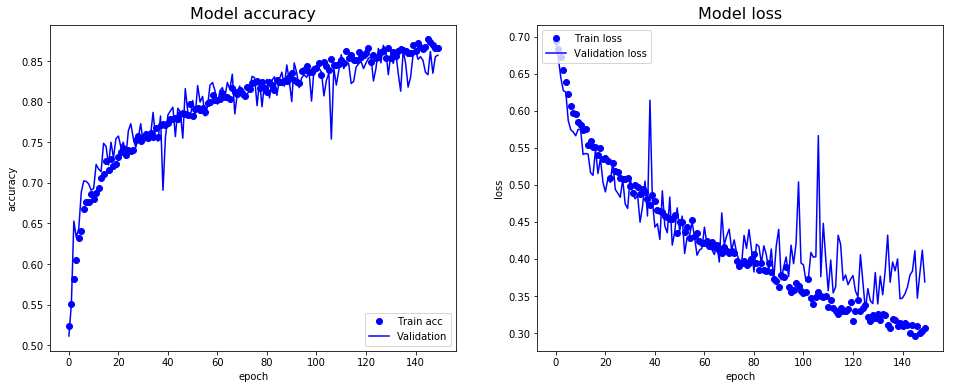

In [8]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# summarize history for accuracy
axis1.plot(epochs, acc, 'bo', label='Train acc')
axis1.plot(epochs, val_acc, 'b', label='Validation')
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(epochs, loss, 'bo', label='Train loss')
axis2.plot(epochs, val_loss, 'b', label='Validation loss')
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper left')
plt.show()

In [9]:
# prep test data
test_dir = os.path.join(base_dir, 'test')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
# evaluate model on test data
score = model.evaluate_generator(test_generator, steps=50)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 84.60%


In [11]:
# predict input image
def image_prediction(input_img):    
    prediction = model.predict(input_img)
    if prediction >= 0.5:
        print("The image is a dog!")
    else:
        print("The image is a cat!")

Shape of the input image tensor: (1, 150, 150, 3)


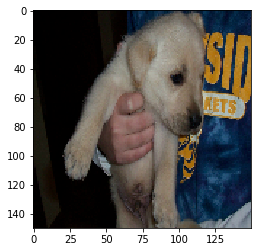

The image is a dog!


In [12]:
# test against new image
from keras.preprocessing import image

img_path = os.path.join(base_dir, 'baby_boom_2.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print("Shape of the input image tensor:", img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()
image_prediction(img_tensor)

Shape of the input image tensor: (1, 150, 150, 3)


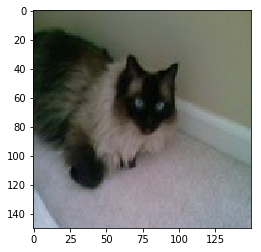

The image is a cat!


In [13]:
# test against another new image
img_path = os.path.join(base_dir, 'Stoops_010.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print("Shape of the input image tensor:", img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()
image_prediction(img_tensor)

In [14]:
# save model and weights
model.save('dog_vs_cats_1.h5')
print("Model saved")
model.save_weights('dog_vs_cats_1_weights.h5')
print("Model weights saved")

Model saved
Model weights saved
